## Seeing and Plotting for the evaluation of the data:
#### We ll use a simple heatmap and histogram to visualize how frequent each source is getting updated

In [713]:
#importing all necessary libraries
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
import warnings 
warnings.filterwarnings('ignore')

In [715]:
from pymongo import MongoClient
import os
from dotenv import load_dotenv
load_dotenv()
mongo_uri = os.getenv("MONGO_URI")

client = MongoClient(mongo_uri)
# Create a new database
db = client["my_db"]

print("Connected to MongoDB!")


import pandas as pd

article = db["articles"]
user = db["users"]
source = db["sources"]

docs = article.find()
df = pd.DataFrame(list(docs))
df.head()

Connected to MongoDB!


,_id,created_at,updated_at,uuid,source_id,url,publish_date,title,content,language
0,680e6133d6ed6d0d4643c71a,2025-04-27 16:54:08.057,2025-04-27 16:54:11.640,b'cl\x9c\x97gYG\xaf\x8b6\xda\xb8\xf2\xf7X\xd6',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://almanar.com.lb/13414865,2025-04-27 16:52:38,8 جرحى بحادث سير على اوتوستراد ‎السعديات باتجا...,أصيب 8 أشخاص يوم الاحد بحادث سير وقع على اوتوس...,ar
1,680e7428d6ed6d0d4643c766,2025-04-27 18:15:03.869,2025-04-27 18:15:04.988,b'iZ\x87\x7f~mIQ\x90\xce\xaa\x91\x8d\xa8\x83\xd2',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://www.aljadeed.tv/news/%d8%ae%d8%a7%d8%b...,2025-04-27 18:12:29,حسين أيوب لـ &quot;وهلق شو&quot;: الحزب لم يتخ...,No content to be displayed.,ar
2,680e742ad6ed6d0d4643c767,2025-04-27 18:15:03.837,2025-04-27 18:15:06.929,b'\xa1\xe3\x98\\CPH\x1b\x86`\x7f\xf6T\xb4\xf1d',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://almanar.com.lb/13415448,2025-04-27 18:13:47,جيش الاحتلال ينسف عدداً من المباني في رفح جنوب...,No content to be displayed.,ar
3,680eae853258ace5920ca46f,2025-04-27 22:24:02.965,2025-04-27 22:24:05.803,b'\x9c\xb75s\xc1\xacN;\xb5\x90\x0em\xeaz\x8e\xad',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://almanar.com.lb/13416119,2025-04-27 22:20:44,طيران الاحتلال يشن غارة شمال مخيم النصيرات وسط...,No content to be displayed.,ar
4,680f0b5370af0940b79444d8,2025-04-28 05:00:02.981,2025-04-28 05:00:03.884,b'\xa3}\xc5\xca\xbc\xe1I\t\x8a\x93\x03ZV\x8dsR',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://www.aljadeed.tv/sports/%d9%83%d8%b1%d8...,2025-04-28 04:42:34,ليفربول يحتفي بفيديو رائع بلقب الدوري الإنجليز...,نشر نادي ليفربول على مواقع التواصل الاجتماعي ف...,ar


In [716]:
print("There is ",len(df), " articles in the DB")

There is  7044  articles in the DB


In [717]:
mayadeen_df = df[df['source_id'] == mayadeen_id]
print("There is ",len(mayadeen_df), " articles from mayadeen")
#apparently there is a major problem in th source IDs

There is  6601  articles from mayadeen


In [718]:
manar_df = df[df['source_id'] == manar_id]
print("There is ",len(manar_df), " articles from manar")

There is  131  articles from manar


In [719]:
mtv_df = df[df['source_id'] == mtv_id]
print("There is ",len(mtv_df), " articles from mtv")

There is  92  articles from mtv


In [720]:
jadeed_df = df[df['source_id'] == jadeed_id]
print("There is ",len(jadeed_df), " articles from jadeed")

There is  131  articles from jadeed


In [721]:
annahar_df = df[df['source_id'] == annahar_id]
print("There is ",len(annahar_df), " articles from annahar")

There is  89  articles from annahar


In [722]:
#checking for duplicate news
df.url.is_unique

True

In [723]:
#checking for empty slots
df.isna().sum()

_id               0
created_at        0
updated_at        0
uuid            118
source_id         0
url               0
publish_date      0
title             0
content           0
language          0
dtype: int64

In [724]:
#we can check for where the language is unknown
df[df['language'] == 'unknown'].head(2)
#notice that the content is empty could be some rapid news or something or video

,_id,created_at,updated_at,uuid,source_id,url,publish_date,title,content,language
49,680f65ebd24b08b0b7ce835b,2025-04-28 11:26:35.452,2025-04-28 11:31:00.921,"b'8\xe4\xc0\xe71xA\xbd\xafwc\x87\xbe\xcb""\x02'",b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QgZ,2025-04-28 09:00:00,نشرة الثانية عشرة,,unknown
126,680f8588d24b08b0b7ce9574,2025-04-28 13:41:28.971,2025-04-28 13:46:15.618,b'}`\xec*/ODv\xa8\x03Z\xd5\xdd\x85\x8a\xb6',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8Qhu,2025-04-28 13:38:59,الرئاسة السورية ترفض مخرجات مؤتمر توحيد الموقف...,,unknown


In [725]:
#checking for empty content:
df[(df['content'] == ' ') | (df['content']== 'No content to be displayed.')]

,_id,created_at,updated_at,uuid,source_id,url,publish_date,title,content,language
1,680e7428d6ed6d0d4643c766,2025-04-27 18:15:03.869,2025-04-27 18:15:04.988,b'iZ\x87\x7f~mIQ\x90\xce\xaa\x91\x8d\xa8\x83\xd2',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://www.aljadeed.tv/news/%d8%ae%d8%a7%d8%b...,2025-04-27 18:12:29,حسين أيوب لـ &quot;وهلق شو&quot;: الحزب لم يتخ...,No content to be displayed.,ar
2,680e742ad6ed6d0d4643c767,2025-04-27 18:15:03.837,2025-04-27 18:15:06.929,b'\xa1\xe3\x98\\CPH\x1b\x86`\x7f\xf6T\xb4\xf1d',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://almanar.com.lb/13415448,2025-04-27 18:13:47,جيش الاحتلال ينسف عدداً من المباني في رفح جنوب...,No content to be displayed.,ar
3,680eae853258ace5920ca46f,2025-04-27 22:24:02.965,2025-04-27 22:24:05.803,b'\x9c\xb75s\xc1\xacN;\xb5\x90\x0em\xeaz\x8e\xad',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,https://almanar.com.lb/13416119,2025-04-27 22:20:44,طيران الاحتلال يشن غارة شمال مخيم النصيرات وسط...,No content to be displayed.,ar
5,680f0b5b70af0940b79444d9,2025-04-28 05:00:10.199,2025-04-28 05:00:11.534,b'\xe7\x13\xb4\xae\xb5\xbeA\x8a\xa0\xd2\xd8Z\x...,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,http://mtv.com.lb/News/1568876,2025-04-28 07:31:00,استهداف أكثر من 800 موقع للحوثيين منذ آذار,No content to be displayed.,ar
6,680f0b5c70af0940b79444dc,2025-04-28 05:00:10.199,2025-04-28 05:00:12.057,b'dyD\xed\xd6\x97Au\x99\xe2a\x86\xea\\-s',b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,http://mtv.com.lb/News/1568877,2025-04-28 07:34:00,عمليّة طعن داخل مدرسة,No content to be displayed.,ar
...,...,...,...,...,...,...,...,...,...,...
7039,680e018cd6ed6d0d4643c622,2025-04-27 10:06:03.533,2025-04-27 10:06:04.381,b'\xba\xaf\xa8[6\xf2L\xf2\xb6\x96\x1f\xfc?\x9b...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,http://mtv.com.lb/News/1568714,2025-04-27 13:04:00,تدابير سير على أوتوستراد جبيل بسبب أعمال تزفيت,No content to be displayed.,ar
7040,680dedded6ed6d0d4643c5ec,2025-04-27 08:42:05.269,2025-04-27 08:42:06.423,b'c\x84\xca\xa1\xcbHO)\x86\xaa\xf4\x16\xa6\xd2...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,http://mtv.com.lb/News/1568702,2025-04-27 11:40:00,الصادق: جملة من العوامل تستدعي التفكير الجدي ب...,No content to be displayed.,ar
7041,680e0242d6ed6d0d4643c624,2025-04-27 10:09:04.608,2025-04-27 10:09:06.408,b'\xfeTv\xa3\xf1\xb1FQ\xb0AMu\x92\xc3a\x83',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://www.aljadeed.tv/news/%d8%b9%d8%b1%d8%a...,2025-04-27 10:08:30,وزارة الدفاع الإيرانية: لا وجود لشحنات عسكرية ...,No content to be displayed.,ar
7042,680e0243d6ed6d0d4643c625,2025-04-27 10:09:05.391,2025-04-27 10:09:07.044,b'\x86\x8b\x0e\xff\x8d\xa6H\xbc\x8e\xb0 \x0f\x...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,http://mtv.com.lb/News/1568715,2025-04-27 13:07:00,الجيش: توقيف 4 مواطنين وهذا ما ضُبط,No content to be displayed.,ar


## we can plot which sources have the most empty contents
### but 1606 news out of 3300 is A LOT

### we need to first group them by days i.e. get all of the number of articles that are uploaded in this day

In [728]:
import datetime
#we'll have a list of the corresponding news article
news_list_dict = ['mayadeen', 'annahar', 'mtv', 'jadeed', 'manar']
#now we need to establish the corresponding frequencies

In [729]:
mayadeen_df[mayadeen_df['publish_date'] > str(datetime.date.today())]

,_id,created_at,updated_at,uuid,source_id,url,publish_date,title,content,language
26,680f0b3ad24b08b0b7ce4fc5,2025-04-28 04:59:38.970,2025-04-28 05:04:08.173,b'\xab!\x8a\xc2\r\x02L\xfd\x9f\xb8\xfa\xbdP\xf...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QfB,2025-04-28 04:55:15,اليمن: عشرات الشهداء والجرحى في عدوان أميركي ا...,أفاد مراسل الميادين في اليمن، بارتقاء عدد من ا...,ar
36,680f1eecd24b08b0b7ce5b1b,2025-04-28 06:23:40.876,2025-04-28 06:29:01.366,b'<8[\x9b\xe5\xbaC\xaf\xac\xf5l\x95?\x84\x18C',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QfW,2025-04-28 06:19:43,الصين: مستعدون لمناقشة الرسوم الجمركية وننتظر ...,أكّد مبعوث الصين الدائم لدى مكتب الأمم المتحدة...,ar
43,680f6fcfd24b08b0b7ce890c,2025-04-28 12:08:47.131,2025-04-28 12:13:22.919,b'\xb6h\xb0{\xe9\x04I\xce\xbc4_\x96\xf9^V\x1f',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QhD,2025-04-28 12:08:33,بوتين يعلن هدنة مؤقتة مع أوكرانيا بمناسبة ذكرى...,أعلن الرئيس الروسي، فلاديمير بوتين، اليوم الاث...,ar
49,680f65ebd24b08b0b7ce835b,2025-04-28 11:26:35.452,2025-04-28 11:31:00.921,"b'8\xe4\xc0\xe71xA\xbd\xafwc\x87\xbe\xcb""\x02'",b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QgZ,2025-04-28 09:00:00,نشرة الثانية عشرة,,unknown
56,680fa28982d46bc66b4ddd22,2025-04-28 15:45:13.899,2025-04-28 15:51:02.554,b'A}v\xad\x18bDW\xb1\xb1J\xb5\xe5\x96\x1f\xd1',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QiL,2025-04-28 15:35:43,وزير الدفاع الباكستاني يحذر: التوغل العسكري ال...,"نقلت وكالة ""رويترز""، عن وزير الدفاع الباكستاني...",ar
...,...,...,...,...,...,...,...,...,...,...
596,680f475ed24b08b0b7ce718f,2025-04-28 09:16:14.607,2025-04-28 09:20:15.610,b')Q\x04\xf7\x89\xbfM\xc0\xa2\x04i\x86\x1f<:Q',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8Qg6,2025-04-28 07:00:00,نشرة العاشرة صباحاً,,unknown
598,680f32ded24b08b0b7ce6636,2025-04-28 07:48:46.132,2025-04-28 07:53:26.219,b'\x88\xf3\x98F\xe7\x9eA\xbf\x82\x02b\xb4\x88\...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8Qfx,2025-04-28 07:46:24,رسوم ترامب الجمركية تؤثر سلباً على الموانئ الأ...,"تحدّثت صحيفة ""فايننشال تايمز"" البريطانية، في ت...",ar
608,680f50dbd24b08b0b7ce7736,2025-04-28 09:56:43.981,2025-04-28 10:01:24.889,b'I\n\xebK\xca\x1aB\xdd\xa4y\xaf\xe0\x93\xba\x...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QgU,2025-04-28 09:54:25,"""العدل اليمنية"": 1300 بين شهيد وجريح جراء العد...",أعلنت وزارة العدل وحقوق الإنسان اليمنية في صنع...,ar
613,680f8e9bd24b08b0b7ce9a6e,2025-04-28 14:20:11.571,2025-04-28 14:25:19.896,b'\xc1\x81\xfc\x97N\xd1K\x10\xa0i\xe9+\x10\xb6...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QhW,2025-04-28 14:18:12,السيسي والبرهان يبحثان التطورات في السودان وتق...,بحث الرئيس المصري، عبد الفتاح السيسي، مع رئيس ...,ar


In [730]:
today = mayadeen_df[mayadeen_df['publish_date'] > str(datetime.date.today())]
today

,_id,created_at,updated_at,uuid,source_id,url,publish_date,title,content,language
26,680f0b3ad24b08b0b7ce4fc5,2025-04-28 04:59:38.970,2025-04-28 05:04:08.173,b'\xab!\x8a\xc2\r\x02L\xfd\x9f\xb8\xfa\xbdP\xf...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QfB,2025-04-28 04:55:15,اليمن: عشرات الشهداء والجرحى في عدوان أميركي ا...,أفاد مراسل الميادين في اليمن، بارتقاء عدد من ا...,ar
36,680f1eecd24b08b0b7ce5b1b,2025-04-28 06:23:40.876,2025-04-28 06:29:01.366,b'<8[\x9b\xe5\xbaC\xaf\xac\xf5l\x95?\x84\x18C',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QfW,2025-04-28 06:19:43,الصين: مستعدون لمناقشة الرسوم الجمركية وننتظر ...,أكّد مبعوث الصين الدائم لدى مكتب الأمم المتحدة...,ar
43,680f6fcfd24b08b0b7ce890c,2025-04-28 12:08:47.131,2025-04-28 12:13:22.919,b'\xb6h\xb0{\xe9\x04I\xce\xbc4_\x96\xf9^V\x1f',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QhD,2025-04-28 12:08:33,بوتين يعلن هدنة مؤقتة مع أوكرانيا بمناسبة ذكرى...,أعلن الرئيس الروسي، فلاديمير بوتين، اليوم الاث...,ar
49,680f65ebd24b08b0b7ce835b,2025-04-28 11:26:35.452,2025-04-28 11:31:00.921,"b'8\xe4\xc0\xe71xA\xbd\xafwc\x87\xbe\xcb""\x02'",b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QgZ,2025-04-28 09:00:00,نشرة الثانية عشرة,,unknown
56,680fa28982d46bc66b4ddd22,2025-04-28 15:45:13.899,2025-04-28 15:51:02.554,b'A}v\xad\x18bDW\xb1\xb1J\xb5\xe5\x96\x1f\xd1',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QiL,2025-04-28 15:35:43,وزير الدفاع الباكستاني يحذر: التوغل العسكري ال...,"نقلت وكالة ""رويترز""، عن وزير الدفاع الباكستاني...",ar
...,...,...,...,...,...,...,...,...,...,...
596,680f475ed24b08b0b7ce718f,2025-04-28 09:16:14.607,2025-04-28 09:20:15.610,b')Q\x04\xf7\x89\xbfM\xc0\xa2\x04i\x86\x1f<:Q',b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8Qg6,2025-04-28 07:00:00,نشرة العاشرة صباحاً,,unknown
598,680f32ded24b08b0b7ce6636,2025-04-28 07:48:46.132,2025-04-28 07:53:26.219,b'\x88\xf3\x98F\xe7\x9eA\xbf\x82\x02b\xb4\x88\...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8Qfx,2025-04-28 07:46:24,رسوم ترامب الجمركية تؤثر سلباً على الموانئ الأ...,"تحدّثت صحيفة ""فايننشال تايمز"" البريطانية، في ت...",ar
608,680f50dbd24b08b0b7ce7736,2025-04-28 09:56:43.981,2025-04-28 10:01:24.889,b'I\n\xebK\xca\x1aB\xdd\xa4y\xaf\xe0\x93\xba\x...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QgU,2025-04-28 09:54:25,"""العدل اليمنية"": 1300 بين شهيد وجريح جراء العد...",أعلنت وزارة العدل وحقوق الإنسان اليمنية في صنع...,ar
613,680f8e9bd24b08b0b7ce9a6e,2025-04-28 14:20:11.571,2025-04-28 14:25:19.896,b'\xc1\x81\xfc\x97N\xd1K\x10\xa0i\xe9+\x10\xb6...,b'\x83\x10\xfb\x18D L\xac\x930\x9b\x17\x8b\x82...,https://mdn.tv/8QhW,2025-04-28 14:18:12,السيسي والبرهان يبحثان التطورات في السودان وتق...,بحث الرئيس المصري، عبد الفتاح السيسي، مع رئيس ...,ar


In [731]:
#transforming into hours and not datetime
def get_hours(date):
    return date.hour

def day_news(news_df):
    return news_df[news_df['created_at'] > str(datetime.date.today())].publish_date
def hour_news(news_df):
    day_series = day_news(news_df)
    return day_series.to_frame().applymap(get_hours)
hour_mayadeen = hour_news(mayadeen_df).value_counts()
hour_mtv = hour_news(mtv_df).value_counts()
hour_manar = hour_news(manar_df).value_counts()
hour_jadeed = hour_news(jadeed_df).value_counts()
hour_annahar = hour_news(annahar_df).value_counts()

## Plotting Frequency

In [733]:
hour_mayadeen

publish_date
12              12
9                8
11               8
14               8
5                7
7                5
8                5
13               5
15               5
6                3
10               3
3                1
4                1
19               1
Name: count, dtype: int64

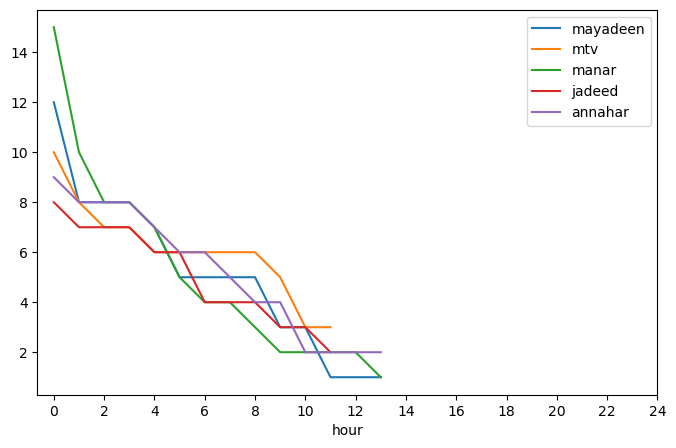

In [734]:
plt.figure(figsize=(8, 5))
hour_mayadeen.plot(label = 'mayadeen')
hour_mtv.plot(label = 'mtv')
hour_manar.plot(label = 'manar')
hour_jadeed.plot(label = 'jadeed')
hour_annahar.plot(label = 'annahar')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22', '24'])
plt.xlabel('hour')
plt.legend()
plt.show()

### for the distributions of the number of charachters

In [736]:
def get_count(content):
    return len(content)
mayadeen_count_char = mayadeen_df['content'].to_frame().applymap(get_count)
annahar_count_char = annahar_df['content'].to_frame().applymap(get_count)
mtv_count_char = mtv_df['content'].to_frame().applymap(get_count)
jadeed_count_char = jadeed_df['content'].to_frame().applymap(get_count)
manar_count_char = manar_df['content'].to_frame().applymap(get_count)

In [737]:
#setting up the y and x axis for the histogram
values = [['mayadeen', int(mayadeen_count_char.describe().T['mean'])] , 
          ['annahar', int(annahar_count_char.describe().T['mean']) ],
          ['mtv',int(mtv_count_char.describe().T['mean'])] ,
          ['jadeed',int(jadeed_count_char.describe().T['mean'])] ,
          ['manar',int(manar_count_char.describe().T['mean'])]]
news = ['mayadeen', 'annahar', 'mtv', 'jadeed', 'manar']
count = pd.DataFrame(values, columns = ['news', 'count'])
count

,news,count
0,mayadeen,867
1,annahar,2580
2,mtv,27
3,jadeed,301
4,manar,504


In [738]:
fig = px.histogram(data_frame = count,
                   x='news', y ='count', facet_col_spacing = 1, nbins = 10)
fig.show()

### Number of words: (applying the same logic)

In [740]:
def get_count_wrd(content):
    return len(content.split(' '))
mayadeen_count_wrd = mayadeen_df['content'].to_frame().applymap(get_count_wrd)
annahar_count_wrd = annahar_df['content'].to_frame().applymap(get_count_wrd)
mtv_count_wrd = mtv_df['content'].to_frame().applymap(get_count_wrd)
jadeed_count_wrd = jadeed_df['content'].to_frame().applymap(get_count_wrd)
manar_count_wrd = manar_df['content'].to_frame().applymap(get_count_wrd)

In [741]:
mayadeen_count_wrd.head(3)

,content
26,133
36,174
43,131


In [742]:
#setting up the y and x axis for the histogram
values = [['mayadeen', int(mayadeen_count_wrd.describe().T['mean'])] , 
          ['annahar', int(annahar_count_wrd.describe().T['mean']) ],
          ['mtv',int(mtv_count_wrd.describe().T['mean'])] ,
          ['jadeed',int(jadeed_count_wrd.describe().T['mean'])] ,
          ['manar',int(manar_count_wrd.describe().T['mean'])]]
news = ['mayadeen', 'annahar', 'mtv', 'jadeed', 'manar']
count_wrd = pd.DataFrame(values, columns = ['news', 'count'])
count_wrd

,news,count
0,mayadeen,138
1,annahar,422
2,mtv,5
3,jadeed,48
4,manar,78


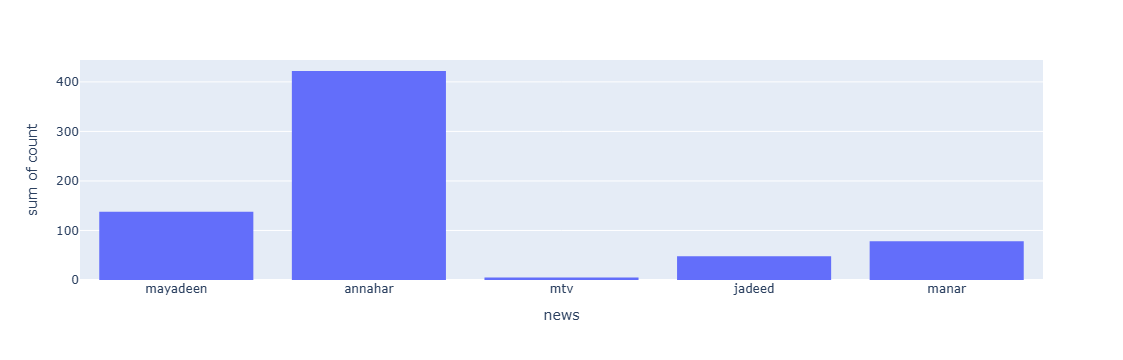

In [743]:
fig = px.histogram(data_frame = count_wrd,
                   x='news', y ='count', facet_col_spacing = 1, nbins = 10)
fig.show()